In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import joblib
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder


In [2]:
data = pd.read_csv('./Dataset/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
print(f"Rows: {data.shape[0]}\nColumns: {data.shape[1]}")

Rows: 400
Columns: 9


In [6]:
data.drop("Serial No.", axis=1, inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit '}>, <Axes: >]],
      dtype=object)

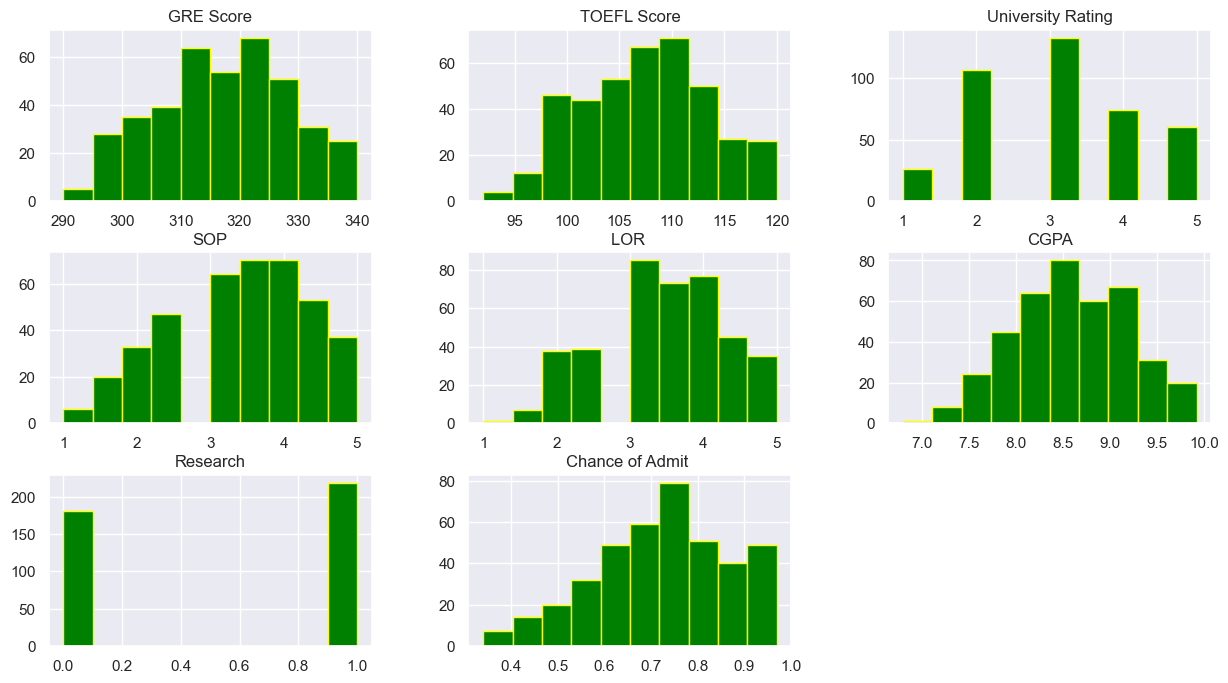

In [7]:
data.hist(figsize=(15, 8), color='green', edgecolor='yellow')

In [8]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]
print(X)
print(y)
#Chia du lieu thanh tap huan luyen va kiem tra
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396 

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

Lr = LinearRegression()
Lr.fit(X_train, y_train)
y_pred_Lr = Lr.predict(X_test)

print(pd.DataFrame({"Actual": y_test, "Predict": y_pred_Lr}).head())
# Calculate R-squared
from sklearn.metrics import r2_score, mean_squared_error

lr_r2 = r2_score(y_test, y_pred_Lr)
accuracy_percentage_lr = lr_r2 * 100
lr_mse = mean_squared_error(y_test, y_pred_Lr)
lr_rmse = np.sqrt(lr_mse)

print(f"Linear Regression R2 Score: {lr_r2} = {accuracy_percentage_lr:.2f}%\nLinear Regression MSE: {lr_mse}, \nLinear Regression RMSE:{lr_rmse}")
# r2_lr = r2_score(y_test, y_pred_Lr)


     Actual   Predict
132    0.71  0.697913
309    0.70  0.693439
341    0.79  0.778827
196    0.73  0.615774
246    0.72  0.722820
Linear Regression R2 Score: 0.7355078738145215 = 73.55%
Linear Regression MSE: 0.004805156569785208, 
Linear Regression RMSE:0.06931923665033544


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=1000,          # Tăng số lượng cây trong rừng
    random_state=420,           # Để kết quả có thể tái lập
    max_depth=20,               # Tăng độ sâu tối đa
    min_samples_split=2,        # Giảm số lượng mẫu tối thiểu để tách một node
    min_samples_leaf=1,         # Giảm số lượng mẫu tối thiểu ở một node lá
    max_features='sqrt',        # Số lượng đặc trưng được xem xét khi tìm kiếm split tốt nhất
    max_leaf_nodes=None,        # Không giới hạn số lượng node lá
    bootstrap=True,             # Sử dụng bootstrap samples
    oob_score=False,            # Không tính toán điểm out-of-bag
    max_samples=None            # Sử dụng toàn bộ dữ liệu
    )

# Huấn luyện mô hình với dữ liệu huấn luyện
rf.fit(X_train, y_train)

# Dự đoán giá nhà trên tập kiểm tra
y_pred_rf = rf.predict(X_test)

print(pd.DataFrame({"Actual": y_test, "Predict": y_pred_rf}).head())

from sklearn.metrics import r2_score, mean_squared_error

rf_r2 = r2_score(y_test, y_pred_rf)
accuracy_percentage_rf = rf_r2 * 100
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(lr_mse)

print(f"Random Forest R2 Score: {rf_r2} = {accuracy_percentage_rf:.2f}%\nRandom Forest MSE: {rf_mse}, \nRandom forestRMSE:{rf_rmse}")
# r2_rf = r2_score(y_test, y_pred_rf)


     Actual  Predict
132    0.71  0.69457
309    0.70  0.66642
341    0.79  0.76002
196    0.73  0.66862
246    0.72  0.72849
Random Forest R2 Score: 0.7238253309966662 = 72.38%
Random Forest MSE: 0.005017398983888862, 
Random forestRMSE:0.06931923665033544


In [11]:
from sklearn.tree import DecisionTreeRegressor

# Khởi tạo mô hình Multinomial Naive Bayes
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)
y_pred_dt = DecisionTree_model.predict(X_test)

print(pd.DataFrame({"Actual": y_test, "Predict": y_pred_dt}).head())

from sklearn.metrics import r2_score, mean_squared_error

dt_r2 = r2_score(y_test, y_pred_dt)
accuracy_percentage_dt = dt_r2 * 100
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)

print(f"Decision Tree R2 Score: {dt_r2} = {accuracy_percentage_dt:.2f}%\nDecision Tree MSE: {dt_mse} \nDecision tree RMSE:{dt_rmse}")
# r2_dt = r2_score(y_test, y_pred_dt)


     Actual  Predict
132    0.71     0.76
309    0.70     0.45
341    0.79     0.77
196    0.73     0.67
246    0.72     0.78
Decision Tree R2 Score: 0.3854405062616161 = 38.54%
Decision Tree MSE: 0.011165 
Decision tree RMSE:0.10566456359631643


In [12]:
best_model = Lr
if dt_r2 > lr_r2 and dt_r2 > rf_r2:
    best_mode = DecisionTree_model
elif rf_r2 > dt_r2 and rf_r2 > lr_r2:
    best_mode = rf
joblib.dump(best_model, "model.pkl")
print(best_model)

LinearRegression()
